In [1]:
import chainer
from chainer.dataset import DatasetMixin
from chainer.datasets import TransformDataset
from chainer.iterators import MultiprocessIterator
from chainercv import transforms
from functools import partial
import glob
from PIL import Image, ImageOps
import numpy as np
import os

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Create Dataset Class

In [2]:
class DogCatTrainDataset(DatasetMixin):
    """Dogs vs. Cats Redux Dataset."""
    
    def __init__(self, data_path):
        """
        Args:
            data_path (string): data path(glob_pattern) for dataset images
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.label_dict = {'cat':0, 'dog':1}
        self.data_list = sorted(glob.glob(data_path, recursive=True))
        
    def __len__(self):
        return len(self.data_list)
    
    def get_example(self, idx):
        image = Image.open(self.data_list[idx])
        label =  self.label_dict[os.path.basename(self.data_list[idx]).split(".")[0]]
        
        return image, label

0


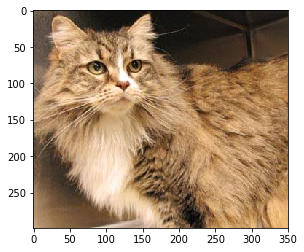

In [3]:
dataset = DogCatTrainDataset(data_path='data/train/*.jpg')
img , label = dataset[100]
print(label)
plt.imshow(np.asarray(img))
plt.show()

# Define Data Iterator

In [4]:
def transform(in_data):
    img, label = in_data
    img_cv = np.asarray(img).transpose(2,0,1).astype(np.float32)/255.
    img = transforms.resize(img_cv, (224, 224))
    return img, label

def load_train_data(data_path, batch_size):
    dataset = DogCatTrainDataset(data_path)
    dataset_trans = TransformDataset(dataset, transform)
    data_iterator = MultiprocessIterator(
        dataset_trans,
        batch_size=batch_size, shuffle = True, n_processes=2)
    return data_iterator

# Check Data Iterator

In [5]:
loader = load_train_data(data_path='data/train/*.jpg', batch_size=2)
items = next(loader)
#print('items: {}\n'.format(items))
print('Batchsize: {}'.format(len(items)))
print('Image: {}'.format(items[0][0].shape))
print('Label: {}'.format(items[0][1]))

Batchsize: 2
Image: (3, 224, 224)
Label: 1


# Custom Transforms

In [6]:
def transform(in_data, bits):
    img, label = in_data
    img = ImageOps.posterize(img, bits)
    return img, label

# Check Transforms

0


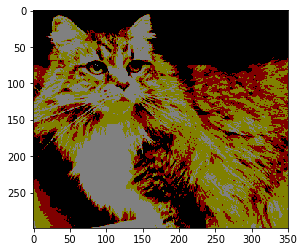

In [7]:
dataset = DogCatTrainDataset(data_path='data/train/*.jpg')
dataset_trans = TransformDataset(dataset, partial(transform, bits=1))
img , label = dataset_trans[100]
print(label)
plt.imshow(np.asarray(img))
plt.show()